### Machine Learning is all about calculating the best numbers of a mathematical equation by minimising the distance between real data and predictions.

# Linear Regression with Python

### when action grows unprofitable, gather information.when information grows unprofitable, sleep 

for this part we are going to use an advertising
The data contains the following columns:

* 'TV' - the amount of money spent for advertising via  Television
* 'Radio' - the amount of money spent for advertising via  Radio
* 'NewsPaper' - the amount of money spent for advertising via  Newspaper
* 'Sales' - the amount of money acquired after investment

**Let's get started!**
let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
advert = pd.read_csv('Advertising.csv')

In [3]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      199 non-null    float64
 2   Newspaper  199 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,199.000000,199.000000,200.000000
mean,147.042500,23.370352,30.665829,14.022500
std,85.854236,14.807682,21.775905,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,10.050000,12.850000,10.375000
50%,149.750000,23.300000,25.900000,12.900000
75%,218.825000,36.550000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# CLEANING 

### Missing values and outliers

In [7]:
advert.isnull().sum()

TV           0
Radio        1
Newspaper    1
Sales        0
dtype: int64

In [8]:
print(advert['Radio'].median())
print(advert['Newspaper'].median())

23.3
25.9


In [9]:
advert['Radio'].fillna(advert['Radio'].median(),inplace=True)
advert['Newspaper'].fillna(advert['Newspaper'].median(),inplace=True)

In [10]:
advert.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

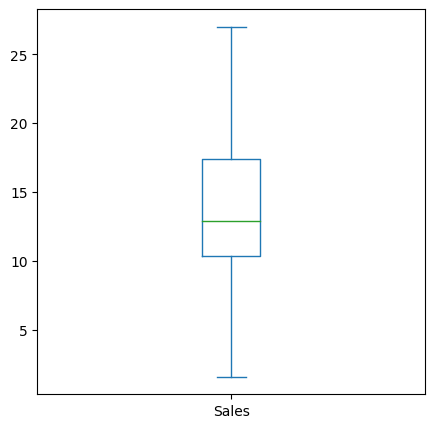

In [11]:
advert['Sales'].plot.box(figsize=(5,5))

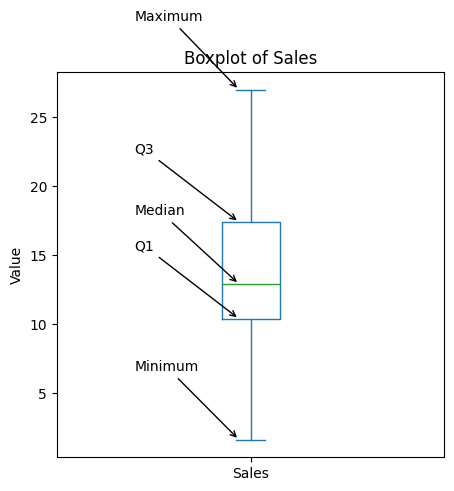

In [14]:
# Plot the boxplot
advert['Sales'].plot.box(figsize=(5,5))

# Add title and axis labels
plt.title('Boxplot of Sales')
plt.ylabel('Value')

# Annotate the boxplot
plt.annotate('Minimum', xy=(0.97, advert['Sales'].min()), xytext=(0.7, advert['Sales'].min()+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Q1', xy=(0.97, advert['Sales'].quantile(0.25)), xytext=(0.7, advert['Sales'].quantile(0.25)+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Median', xy=(0.97, advert['Sales'].median()), xytext=(0.7, advert['Sales'].median()+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Q3', xy=(0.97, advert['Sales'].quantile(0.75)), xytext=(0.7, advert['Sales'].quantile(0.75)+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Maximum', xy=(0.97, advert['Sales'].max()), xytext=(0.7, advert['Sales'].max()+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the plot
plt.show()


# EDA

Let's create some simple plots to check out the data!

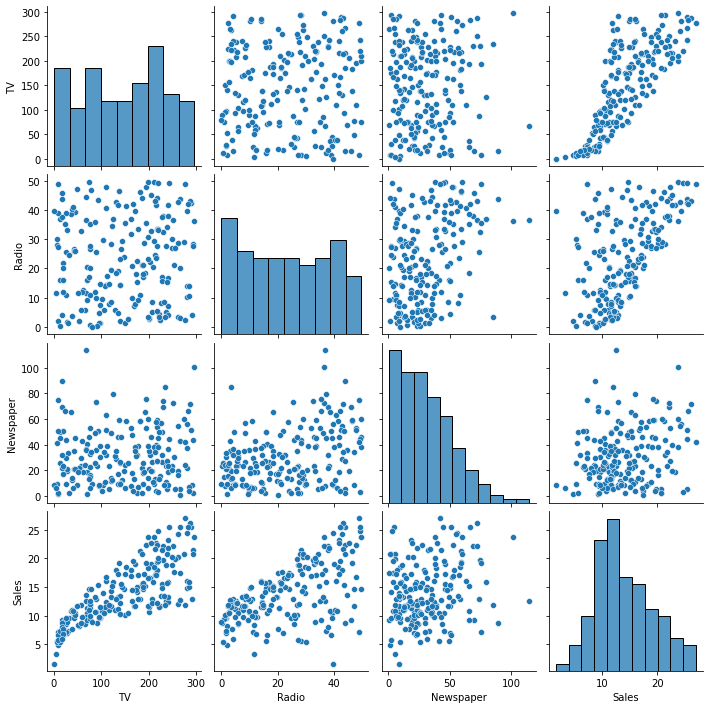

In [13]:
sns.pairplot(advert)

<Axes: xlabel='Sales', ylabel='Count'>

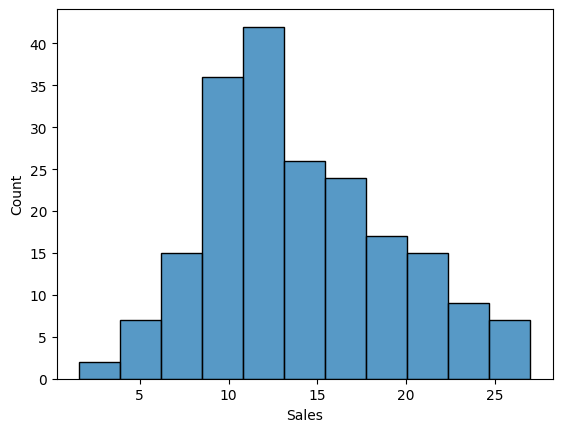

In [22]:
sns.histplot(advert['Sales'])

<Axes: >

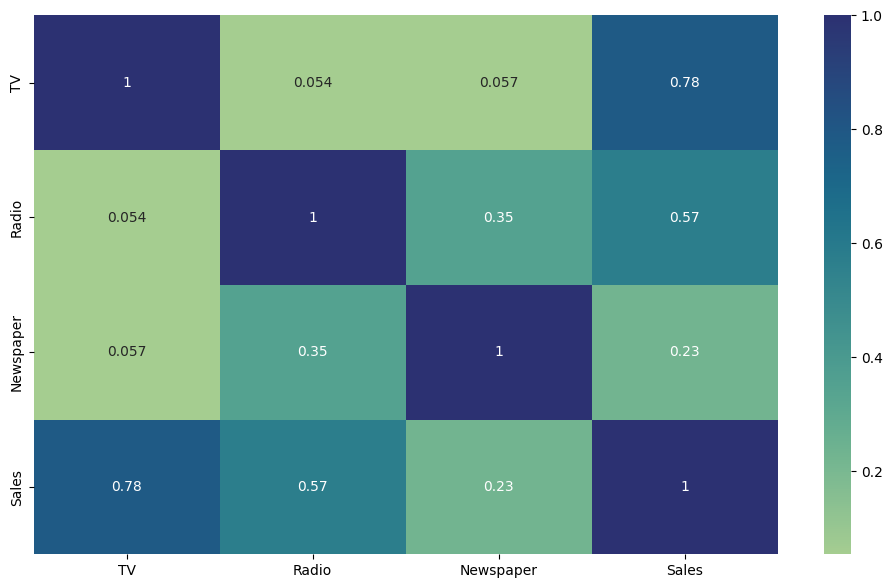

In [23]:
plt.figure(figsize=(12,7))

sns.heatmap(advert.corr(),annot=True,cmap='crest')

# sns.heatmap(advert.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Sales column. We will toss out the the features which have no impact in our dependent variable, in this case there is no such variable so we'll use all of them.

### X and y arrays

In [24]:
X = advert[['TV','Radio','Newspaper']]
y = advert['Sales']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Creating and Training the Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [30]:
# print the intercept

print(lm.intercept_)

2.8588400045182283


In [31]:
lm.coef_

array([0.045357  , 0.19029756, 0.00042473])

In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045357
Radio,0.190298
Newspaper,0.000425


In [33]:
((75*0.190298)+(25*0.045357)+(0*0.000425))+2.85884000451823

18.26511500451823

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **TV advertisement** is associated with an **increase of 0.044818 Tzsh** in total sales.
- Holding all other features fixed, a 1 unit increase in **Radio advertisement** is associated with an **increase of 0.180295 Tzsh** in total sales.
- Holding all other features fixed, a 1 unit increase in **Newspaper advertisement** is associated with an **increase of 0.001170 Tzsh**  in total sales.

Does this make any sense? Probably. This begs for futher information gathering

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [34]:
predictions = lm.predict(X_test)

In [35]:
compare = pd.DataFrame({'preds':predictions,'y_test':y_test})

In [36]:
compare.head(5)

,preds,y_test
37,15.667118,14.7
109,19.564359,19.8
31,11.307218,11.9
89,16.957094,16.7
66,8.969840,9.5


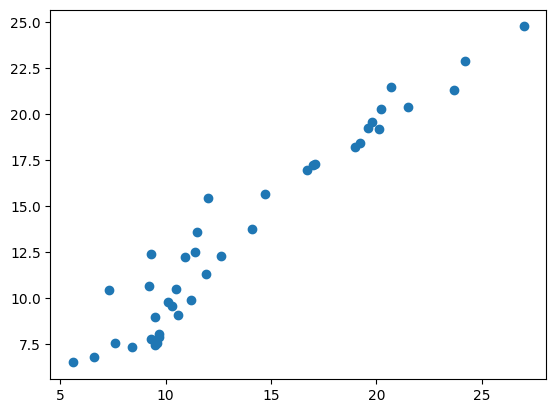

In [37]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/home/neville/vedah/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


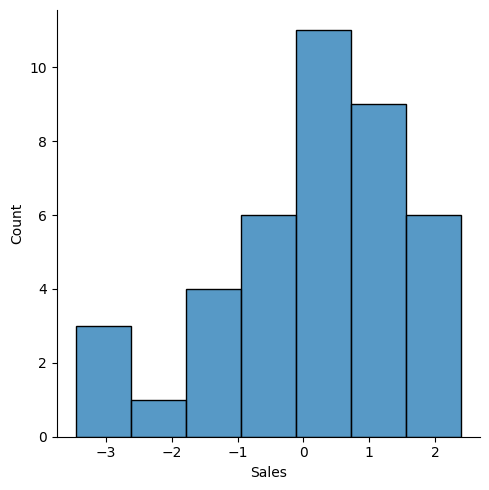

In [41]:
sns.displot((y_test-predictions));

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.333604618695428
MSE: 2.6882400619956246
RMSE: 1.639585332331204


This was your first real Machine Learning Project! Congrats!